In [1]:
from torchvision.models import detection
from torchvision.io import read_image,read_file
import numpy as np
import torch
import torchvision.transforms as transforms
import cv2


c:\Users\mujad\.conda\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt
plt.rcParams["savefig.bbox"] = 'tight'
def show(imgs):
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = transforms.ToPILImage()(img.to('cpu'))
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [3]:
classes=[]
with open("coco_classlabels.txt") as f:
    classes=[line.strip() for line in f.readlines()]

In [4]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
CLASSES = classes
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))
MIN_CONFIDENCE= 0.90

In [5]:
model = detection.fasterrcnn_resnet50_fpn(pretrained=True, progress=True,
	num_classes=len(CLASSES), pretrained_backbone=True).to(DEVICE)

model.eval();

c:\Users\mujad\.conda\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\mujad\.conda\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\mujad\.conda\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and may be removed in the future, please use 'weights_backbone' instead.
  warnings.warn(
c:\Users\mujad\.conda\envs\pytorch\lib\site-packages\torchvision\models\_uti

In [6]:
image = cv2.imread('./sample.jpg')
orig = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.transpose((2, 0, 1))
image = np.expand_dims(image, axis=0)
image = image / 255.0
image = torch.FloatTensor(image)
image = image.to(DEVICE)

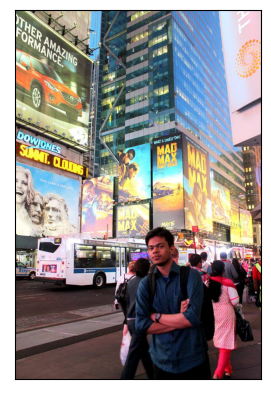

In [7]:
show(image)

In [8]:
detections = model(image)[0]

In [9]:
# loop over the detections
for i in range(0, len(detections["boxes"])):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	confidence = detections["scores"][i]
	# filter out weak detections by ensuring the confidence is
	# greater than the minimum confidence
	if confidence > MIN_CONFIDENCE:
		# extract the index of the class label from the detections,
		# then compute the (x, y)-coordinates of the bounding box
		# for the object
		idx = int(detections["labels"][i])
		box = detections["boxes"][i].detach().cpu().numpy()
		(startX, startY, endX, endY) = box.astype("int")
		# display the prediction to our terminal
		label = "{}: {:.2f}%".format(CLASSES[idx-1], confidence * 100)
		print("[INFO] {}".format(label))
		# draw the bounding box and label on the image0
		cv2.rectangle(orig, (startX, startY), (endX, endY),
			COLORS[idx], 2)
		y = startY - 15 if startY - 15 > 15 else startY + 15
		cv2.putText(orig, label, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
# show the output image
cv2.imwrite('./output.jpg', orig)

[INFO] person: 99.83%
[INFO] bus: 99.37%
[INFO] person: 99.36%
[INFO] person: 98.30%
[INFO] person: 93.85%
[INFO] backpack: 93.22%
[INFO] person: 93.05%
[INFO] car: 92.25%


True

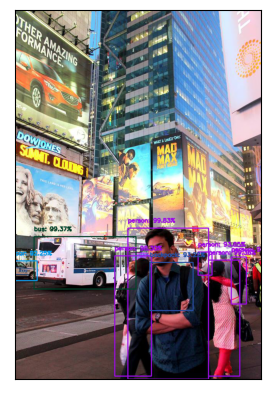

In [10]:
output = cv2.imread('./output.jpg')
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
output = output.transpose((2, 0, 1))
output = np.expand_dims(output, axis=0)
output = output / 255.0
output = torch.FloatTensor(output)
output = output.to(DEVICE)
show(output)